In [85]:
import scanpy as sc 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors, cm
import numpy as np
import scipy
import os

from utils import plot_histogram
from var import *

import pertpy as pt

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

In [5]:
#set seed to 0 for reproducibility of results
np.random.seed(0)

In [6]:
#Create figures folder
figures_folder = os.path.join(results_folder, 'figures/perturbed_rna_exploration/')
if not os.path.exists(figures_folder):
    os.makedirs(figures_folder)

<h3> 1. Data exploration of filtered data </h3>

In [70]:
#load log normlised adata object with filter for cells with more than 5000 UMI counts expressed
adata_preprocessed = sc.read_h5ad(f'/lustre/scratch123/hgi/teams/parts/kl11/cell2state_tf_activation/results/20230116_adata_pre_processed.h5ad')

In [71]:
#load adata obs object from crispra csv file
adata_obs_df=pd.read_csv('/lustre/scratch123/hgi/teams/parts/kl11/cell2state_tf_activation/data/crispra_data_exploration/20230202_perturbation_state.csv', index_col=0)
#order index of adata_obs_df to match adata_preprocessed
adata_obs_df = adata_obs_df.reindex(adata_preprocessed.obs.index)
#check that the index of adata_obs_df matches adata_preprocessed
assert adata_obs_df.index.equals(adata_preprocessed.obs.index)
#overwrite adata_preprocessed.obs with adata_obs_df
adata_preprocessed.obs = adata_obs_df

#filter out cells that are not in the perturbation state
adata_pertubed = adata_preprocessed[adata_preprocessed.obs['perturbation_state'] != 'not_perturbed']

/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/scanpy/tools/_leiden.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = pd.Categorical(
/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<AxesSubplot: title={'center': 'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>

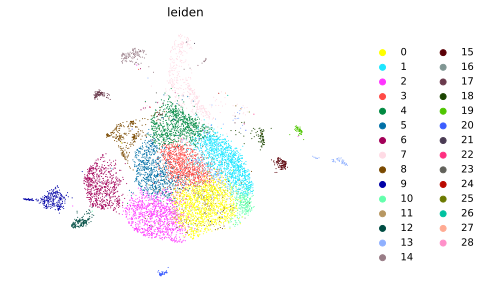

In [82]:
# Leiden clustering with resolution 2
sc.tl.leiden(adata_pertubed, resolution=1)
# Plot UMAP
sc.pl.umap(adata_pertubed, color=['leiden'],
           color_map = 'RdPu', ncols = 3, #legend_loc='on data',
           size=5,
           legend_fontsize=10,
           frameon=False,
           show=False
           )
# plt.savefig(f'{figures_folder}{today}_perturbed_leiden_res_1.pdf')

In [12]:
#select all guides by selecting the names which do not start with ENSG in var_names
targeted_tf_guides = list(adata_pertubed.var_names[~adata_pertubed.var_names.str.startswith('ENSG')])
#use list comprehension to split targeted_tf_guides by '_' and select the first element of the list
targeted_tf = [x.split('_')[0] for x in targeted_tf_guides]

In [13]:
ipsc_tf = ['SOX2', 'KLF4', 'POU5F1', 'NANOG']
cell_cycle = ['MKI67', 'PCNA']
targeted_tf_guides, targeted_tf, ipsc_tf, cell_cycle

(['AIRE_ACAGCAGCGCCTCCATCACA_AIRE_CGGAGACTTCCCGAGAGCGA_1',
  'AIRE_ACAGCAGCGCCTCCATCACA_AIRE_CGGAGACTTCCCGAGAGCGA_2',
  'AIRE_ATCACAGGGAAGTGTCCCTG_AIRE_CAGGGAAGTGTCCCTGCGGG_1',
  'AIRE_ATCACAGGGAAGTGTCCCTG_AIRE_CAGGGAAGTGTCCCTGCGGG_2',
  'ASCL1_AGCCGCTCGCTGCAGCAGCG_ASCL1_GGAGGGGGAGTTTAGGGAGT_1',
  'ASCL1_AGCCGCTCGCTGCAGCAGCG_ASCL1_GGAGGGGGAGTTTAGGGAGT_2',
  'ASCL1_CTCCCCGCTGCTGCAGCGAG_ASCL1_GCAGCCGCTCGCTGCAGCAG_1',
  'ASCL1_CTCCCCGCTGCTGCAGCGAG_ASCL1_GCAGCCGCTCGCTGCAGCAG_2',
  'DBX2_CCGTCCAGATCTGCATAGAG_DBX2_GTCCAGATCTGCATAGAGAG_1',
  'DBX2_CCGTCCAGATCTGCATAGAG_DBX2_GTCCAGATCTGCATAGAGAG_2',
  'DBX2_GCTCCCAGAGCCTACGCTGT_DBX2_GTTTCTCTGGCCGACAGCGT_1',
  'DBX2_GCTCCCAGAGCCTACGCTGT_DBX2_GTTTCTCTGGCCGACAGCGT_2',
  'DLX1_AAAGCTTTGAACCGAGTTTG_DLX1_CCAGTGATTATGCAAGACAG_1',
  'DLX1_AAAGCTTTGAACCGAGTTTG_DLX1_CCAGTGATTATGCAAGACAG_2',
  'DLX1_GTGTGGATGCGTCTTACCCG_DLX1_TAAGACGCATCCACACTTCC_1',
  'DLX1_GTGTGGATGCGTCTTACCCG_DLX1_TAAGACGCATCCACACTTCC_2',
  'DLX5_ACAAAGCATTGCTTAAAAAG_DLX5_GGGTGTTACTGTTG

In [14]:
expected_guides = [
    'AIRE',
    'ASCL1',
    'DLX1',
    'IRF3',
    'LHX6',
    'MAFB',
    'MYOD1',
    'NEUROG2',
    'OLIG2',
    'PROX1',
    'RORA',
    'RORB',
    'SATB2',
    'sgRNA1_SCP',
    'sgRNA6_SCP',
    'ONE_INTERGENIC_SITE_1194'
]

#filter targeted_tf_guides to only include guides which start with the expected_tfs
targeted_tf_guides = [x for x in targeted_tf_guides if x.split('_')[0] in expected_guides]

In [46]:
expected_tf = [
    'AIRE',
    'ASCL1',
    'DLX1',
    'IRF3',
    'LHX6',
    'MAFB',
    'MYOD1',
    'NEUROG2',
    'OLIG2',
    'PROX1',
    'RORA',
    'RORB',
    'SATB2'
]

In [13]:
len(np.unique(targeted_tf)), len(expected_guides)

(23, 16)

<h3> 1.2 Differential gene expression analysis on filtered data </h3>

In [ ]:
sc.pl.dotplot(adata_pertubed, targeted_tf_guides ,
              standard_scale='var',
              groupby='leiden', color_map = 'RdPu',
              gene_symbols='SYMBOL', show=False)
#save plot 
# plt.savefig(f'{figures_folder}{today}_dotplot_guides_cluster.pdf',bbox_inches='tight')

sc.pl.umap(adata_pertubed, color=['perturbation_state'],
           color_map='RdPu', ncols=4, #legend_loc='on data',
           vmin=0, vmax='p99.999', size=10,
           legend_fontsize=10, gene_symbols='SYMBOL',show=False,frameon=False)
#save plot
plt.savefig(f'{figures_folder}{today}_umap_perturbed_state.pdf',bbox_inches='tight')


/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModification

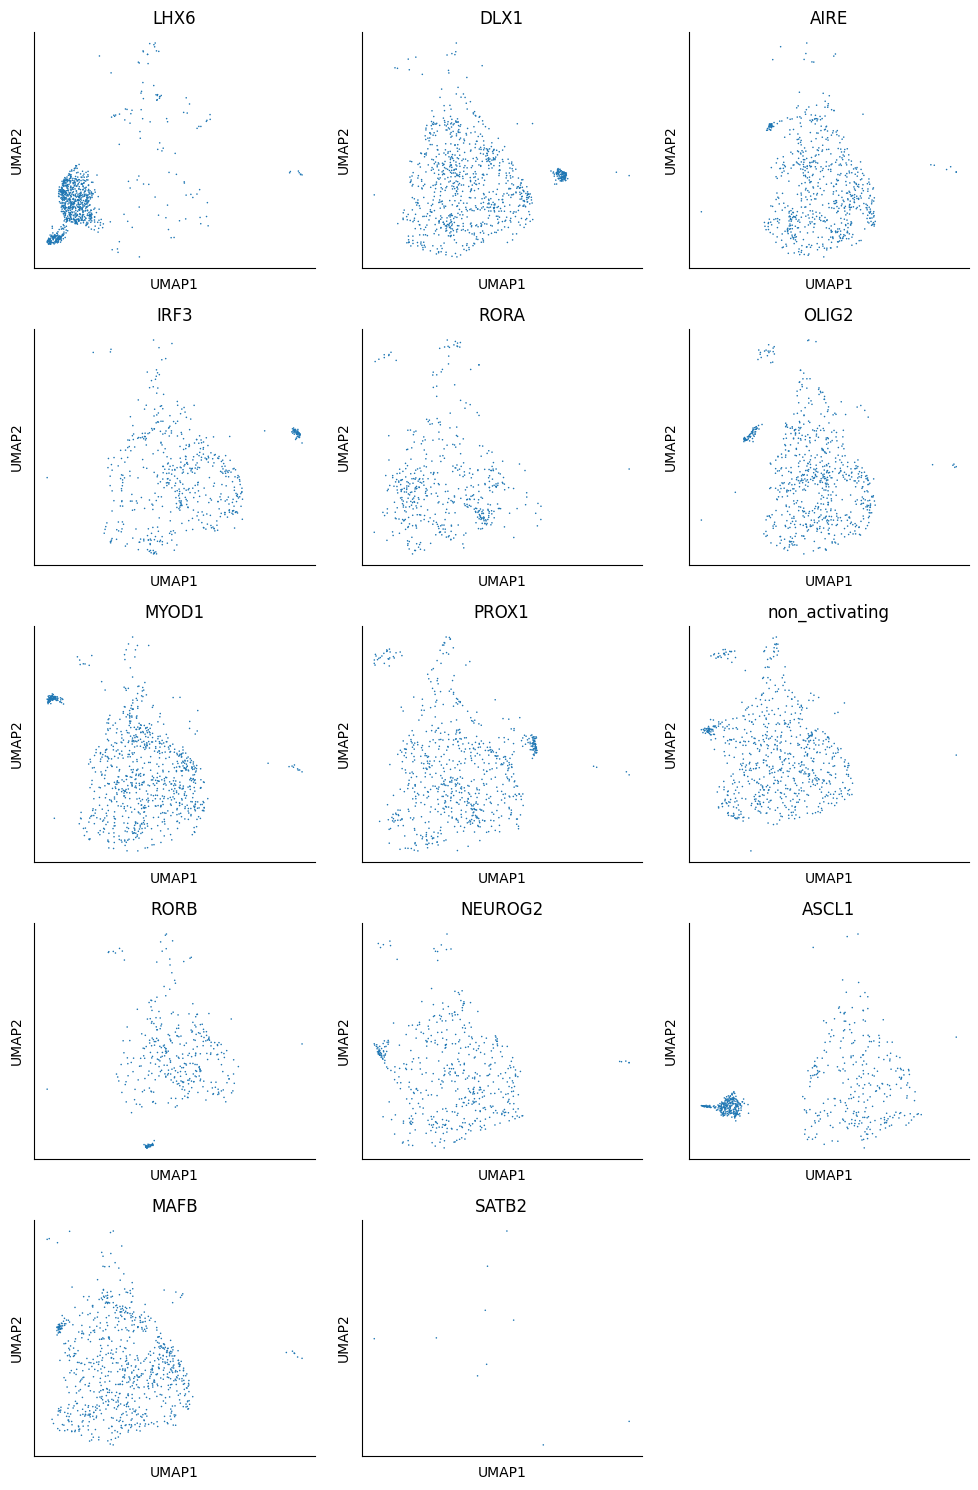

In [8]:
perturbation_states = adata_pertubed.obs['perturbation_state'].unique()
n_rows = 5
#round up to get the number of rows

n_cols = np.round(len(perturbation_states)/n_rows).astype(int)
#use plt.subplots to create a figure with the number of rows and columns increase spacing between subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 15))
axes = axes.ravel()

for i, perturbation_state in enumerate(perturbation_states):
    adata_pertubed_state = adata_pertubed[adata_pertubed.obs['perturbation_state'] == perturbation_state]
    sc.pl.umap(adata_pertubed_state, color=['perturbation_state'],
                color_map='RdPu', ncols=4, #legend_loc='on data',
                size=5,
                legend_fontsize=10, gene_symbols='SYMBOL', ax=axes[i], show=False, legend_loc=None)
    #tight bbox
    plt.tight_layout()
    axes[i].set_title(perturbation_state)
#remove the axis from the last subplot as it is empty
axes[14].set_axis_off()


plt.savefig(f'{figures_folder}{today}_umap_targeting_plasmids_perturbed_state.pdf',bbox_inches='tight')            

In [11]:
sc.pl.umap(adata_pertubed, color=expected_tf,
           color_map='RdPu', ncols=3, #legend_loc='on data',
           size=10,
           legend_fontsize=10, gene_symbols='SYMBOL')

NameError: name 'expected_tf' is not defined

In [17]:
#log p transform counts
adata_filter_leiden.layers['log1p'] = np.log1p(adata_filter_leiden.layers['counts'])

In [ ]:
#ranked genes based on clustering on layer log1p
sc.tl.rank_genes_groups(adata_filter_leiden, 'leiden', method='t-test', layer='log1p')
sc.pl.rank_genes_groups(adata_filter_leiden, n_genes=25, sharey=False, gene_symbols='SYMBOL')

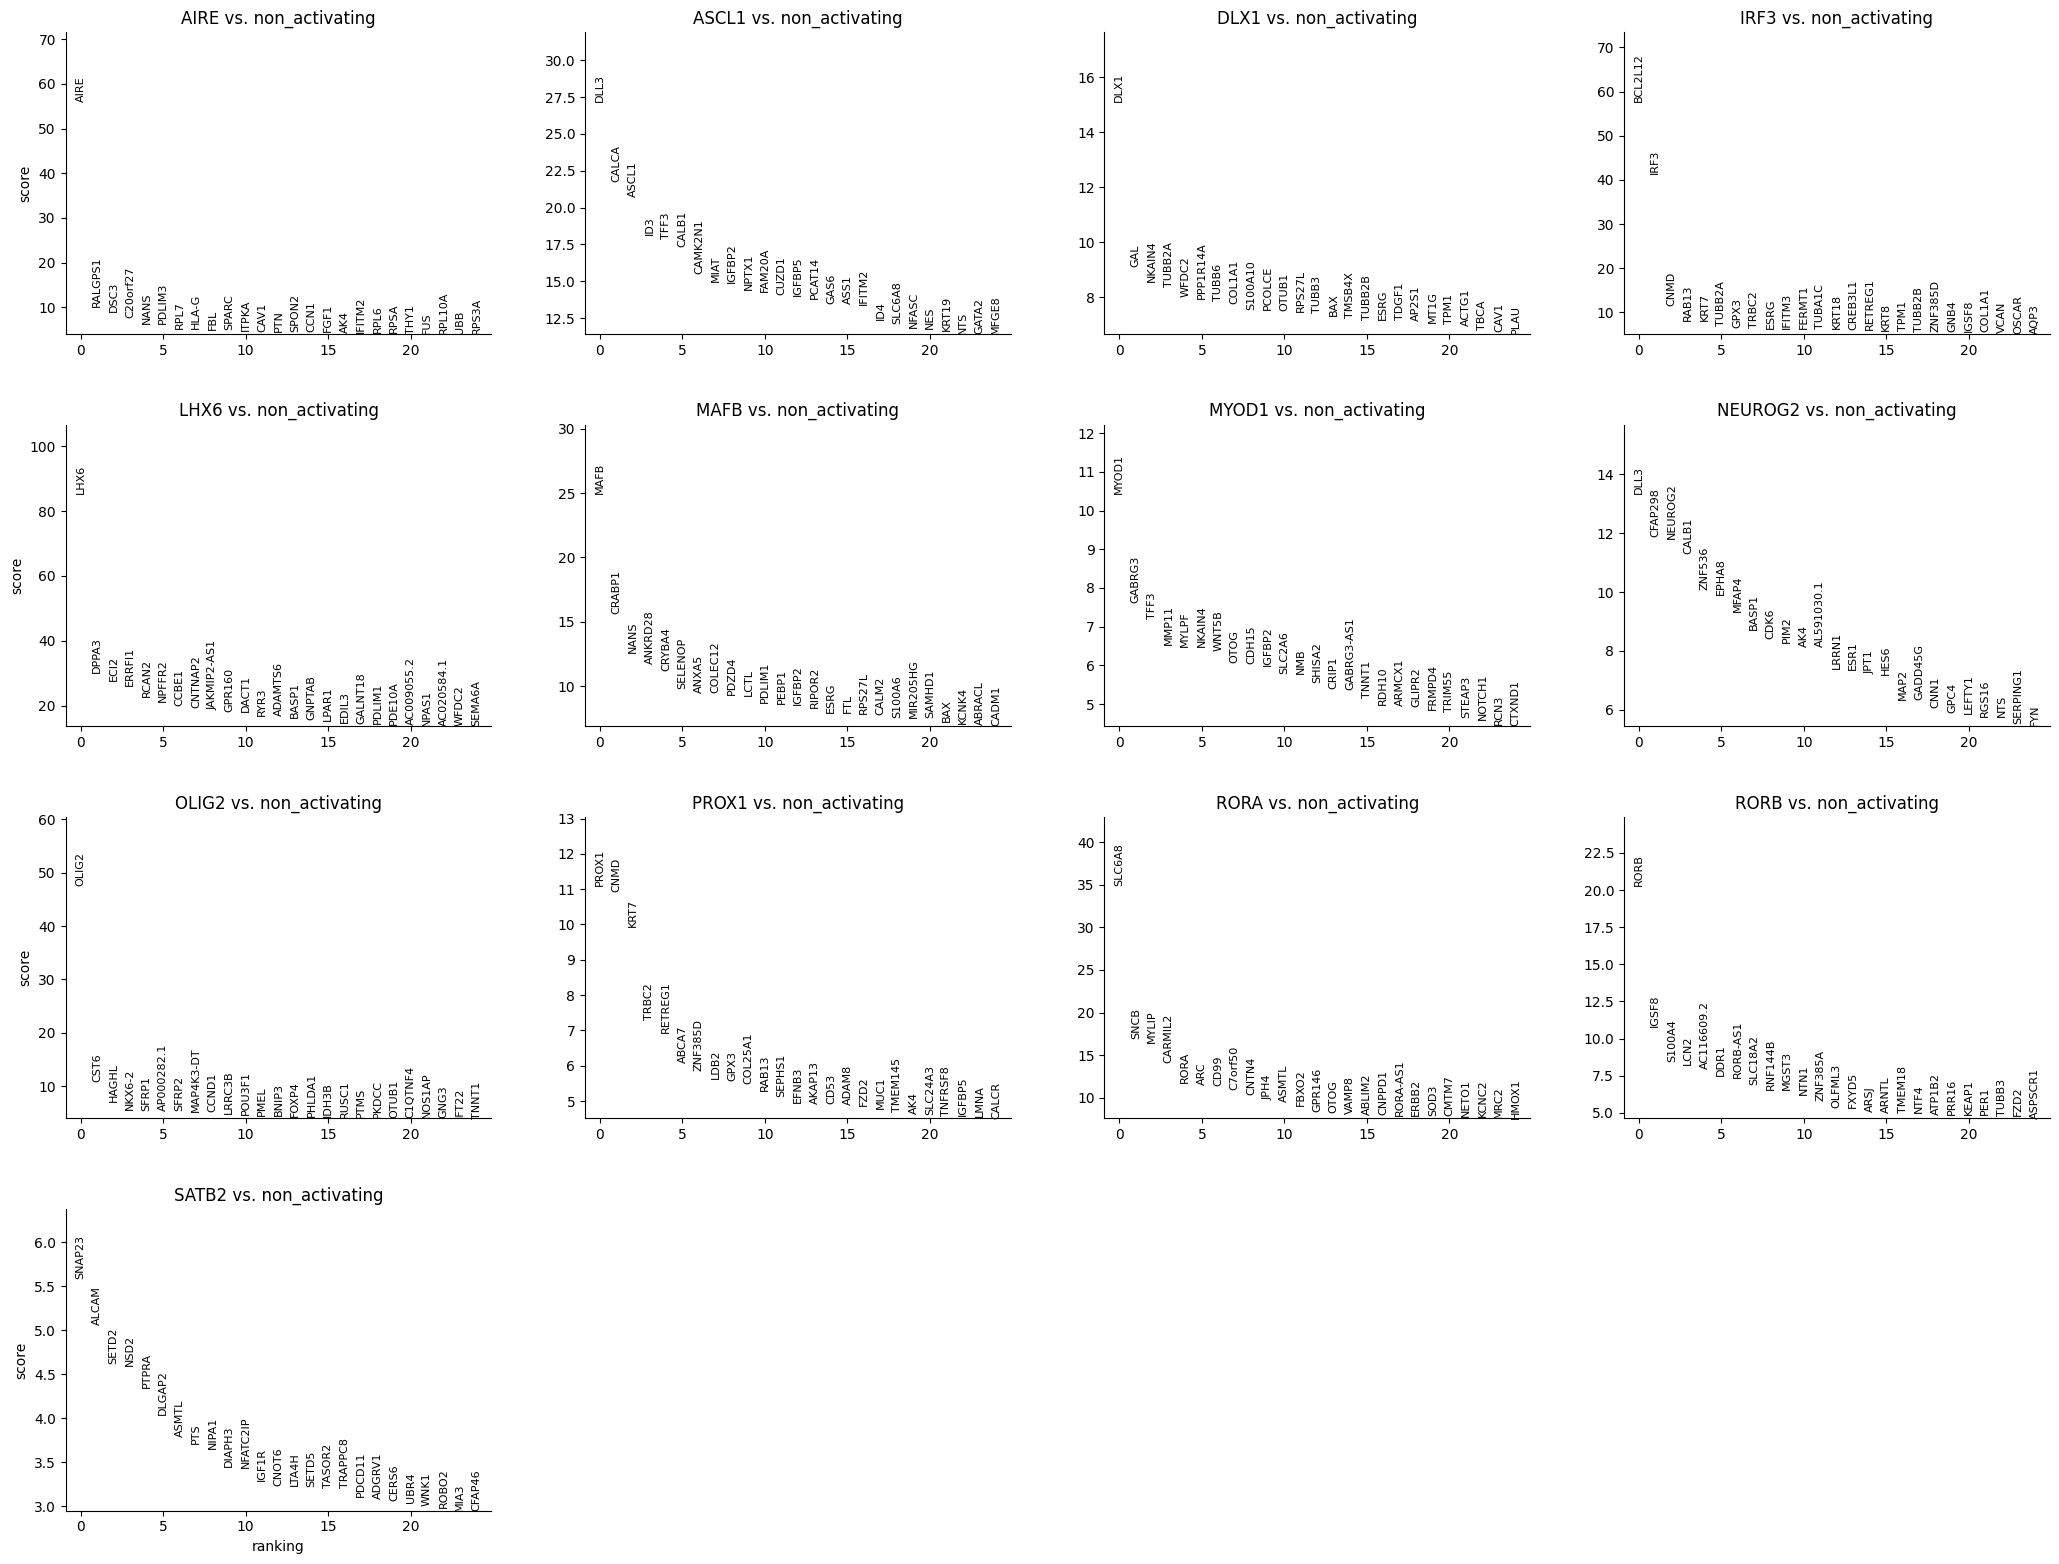

In [18]:
#create list of perturbation states excluding the control state
perturbation_states = adata_filter_leiden.obs['perturbation_state'].unique().tolist()
perturbation_states.remove('non_activating')
#ranked genes pertubed compared to non-activatedb as reference
sc.tl.rank_genes_groups(adata_filter_leiden, 'perturbation_state', reference='non_activating', method='t-test', layer='log1p')
sc.pl.rank_genes_groups(adata_filter_leiden, n_genes=25, sharey=False, gene_symbols='SYMBOL')


In [31]:
#extracting log2 fold change and p values for each perturbation state from tl.rank_genes_groups
#and create list of pandas dataframe
perturbation_state_ranked_genes = []
for perturbation_state in perturbation_states:
    df = pd.DataFrame(adata_filter_leiden.uns['rank_genes_groups']['names'][perturbation_state])
    df['log2_fold_change'] = adata_filter_leiden.uns['rank_genes_groups']['logfoldchanges'][perturbation_state]
    df['pvals'] = adata_filter_leiden.uns['rank_genes_groups']['pvals'][perturbation_state]
    df['pvals_adj'] = adata_filter_leiden.uns['rank_genes_groups']['pvals_adj'][perturbation_state]

    #data wrangling to increase interpretability of volcano plot 
    #add low p value cutoff to avoid underflow
    pval_cutoff = 1e-100
    #add cutoff to adjust p values column of df
    df['pvals_adj'] = df['pvals_adj'].apply(lambda x: x if x > pval_cutoff else pval_cutoff)
    df['perturbation_state'] = perturbation_state
    #change log2 fold change with this formula sign(x)*min(abs(x), 5)]
    df['log2_fold_change'] = df['log2_fold_change'].apply(lambda x: np.sign(x)*min(np.abs(x), 5))

    #df column 0 is the gene ids
    df['names'] = df[0]
    #drop column 0
    df = df.drop(columns=0)
    #map gene symbols to gene ids
    df['SYMBOL'] = df['names'].map(adata_filter_leiden.var['SYMBOL'])
    perturbation_state_ranked_genes.append(df)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f7e0addaf70> (for post_execute):


KeyboardInterrupt: 

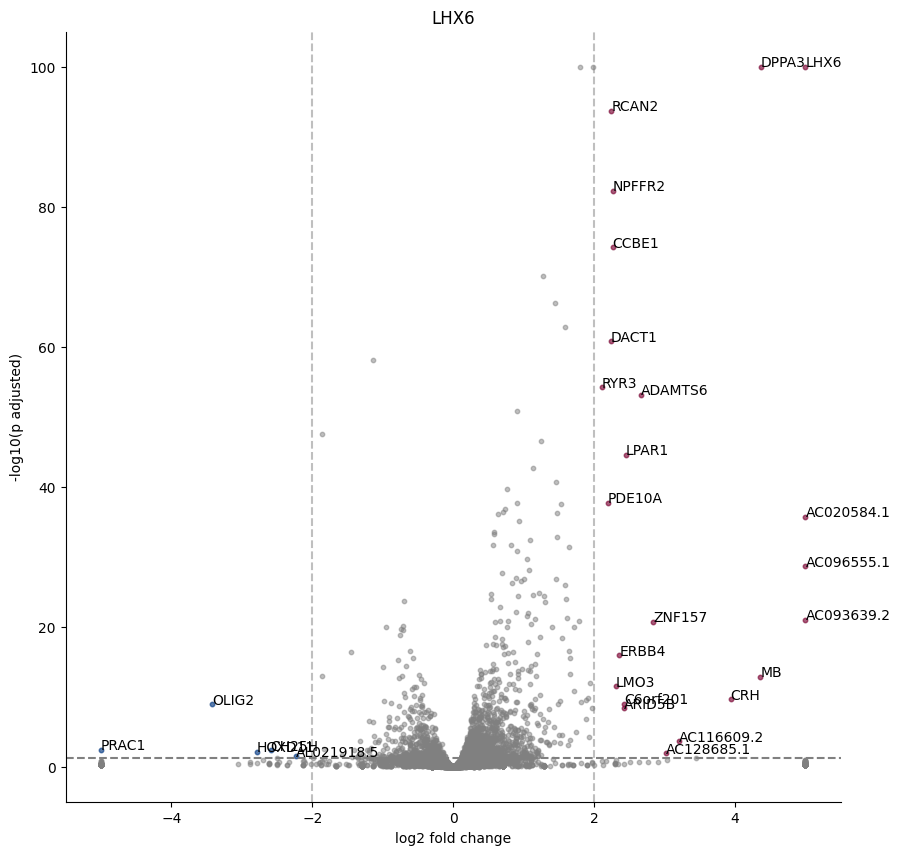

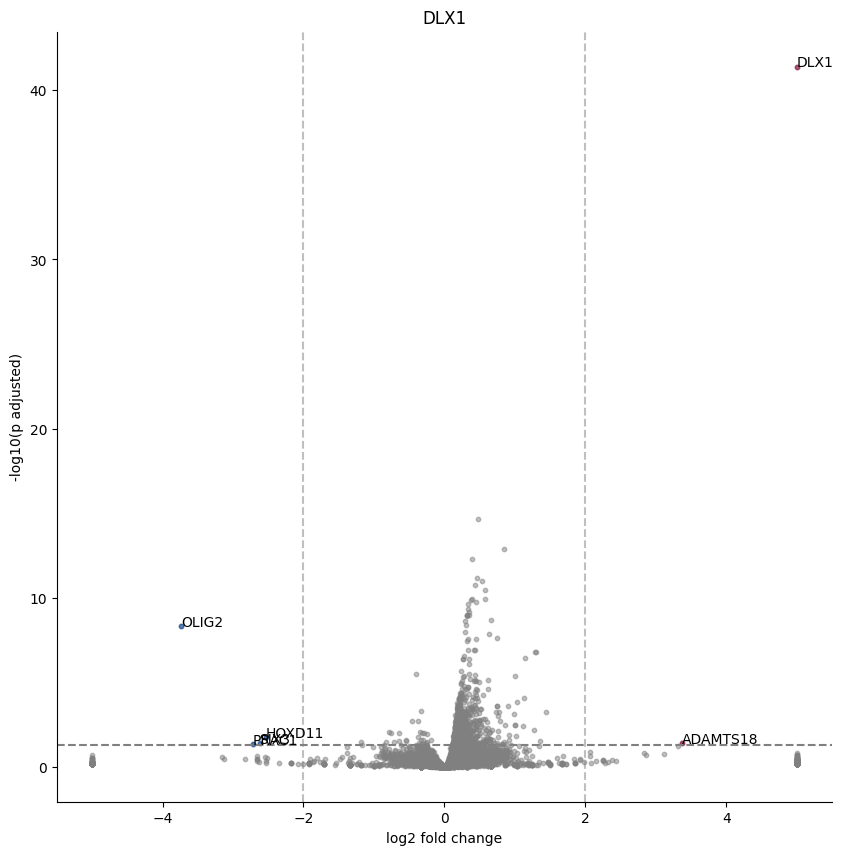

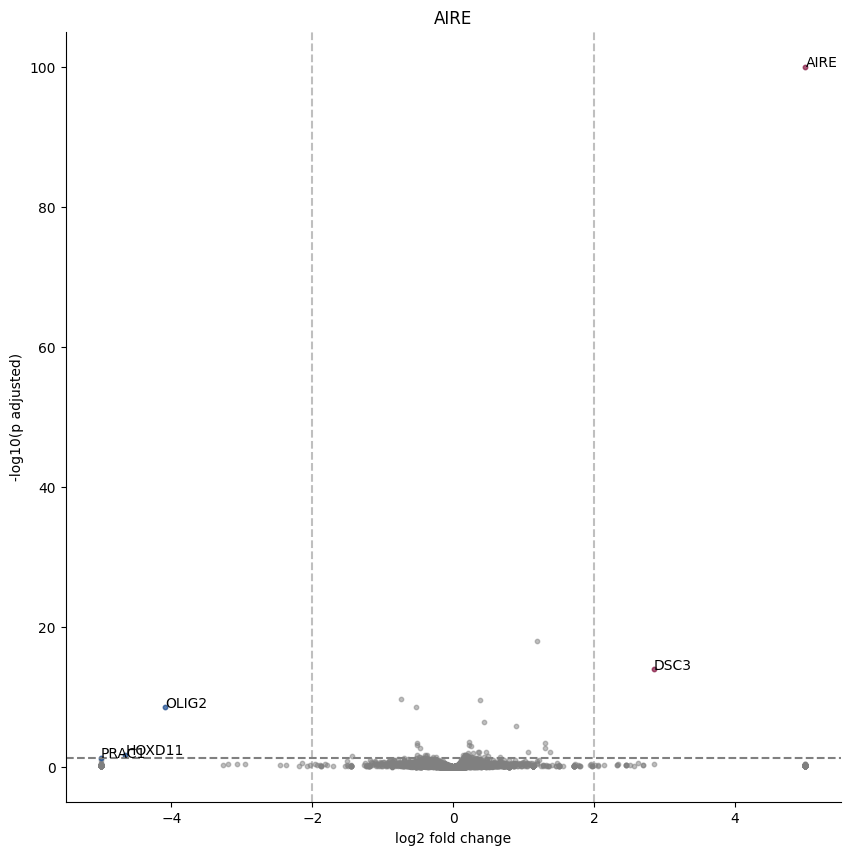

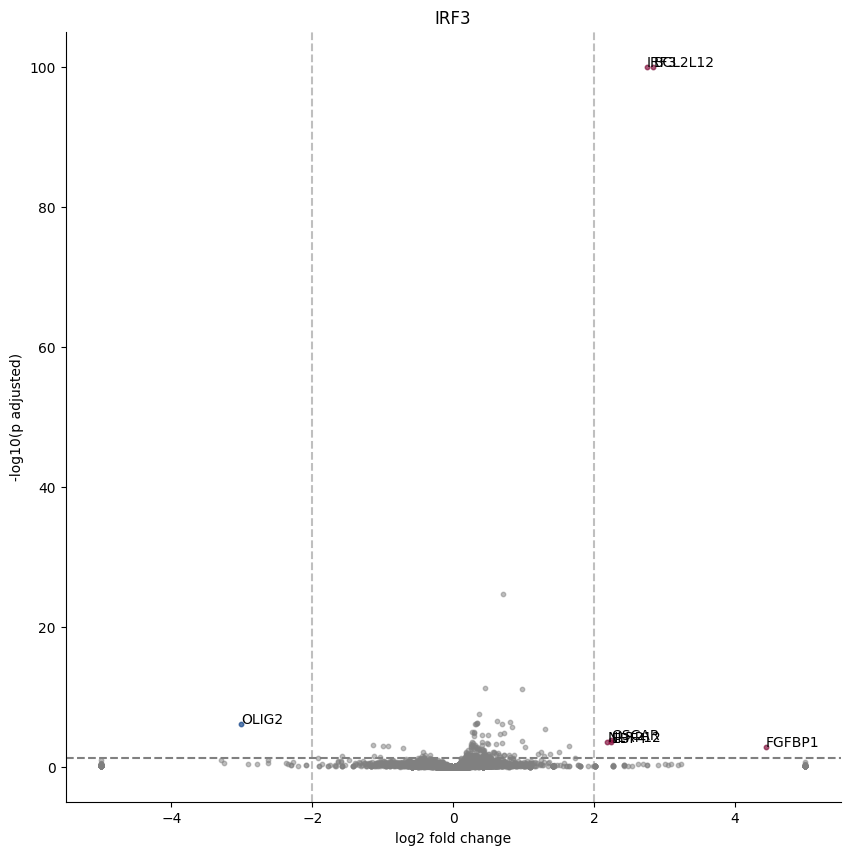

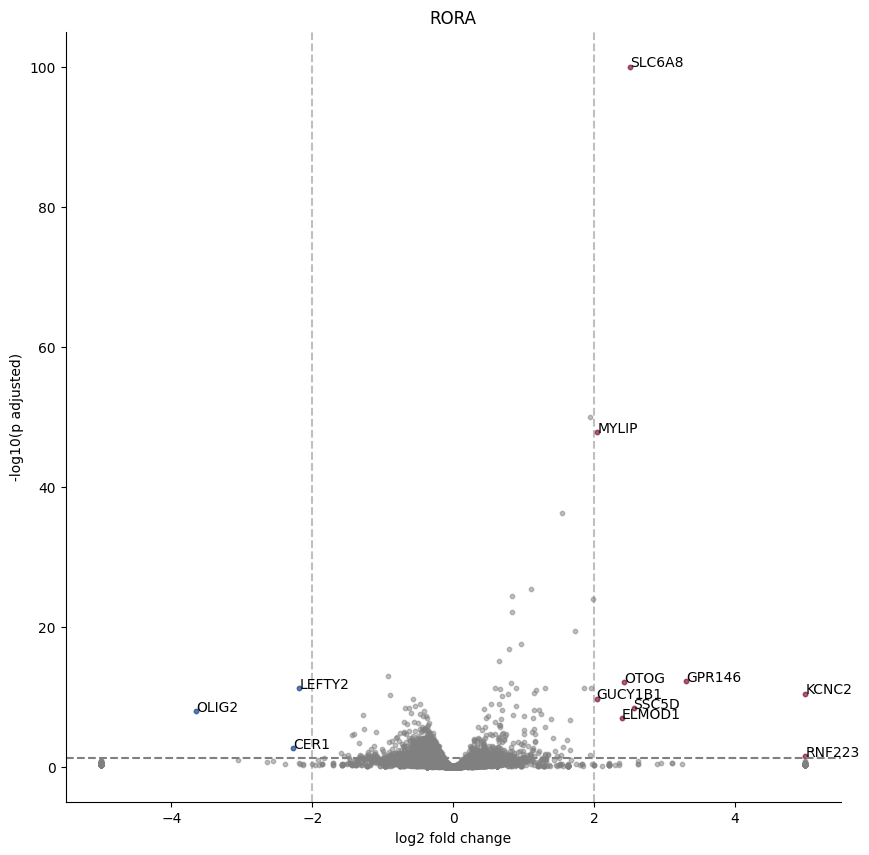

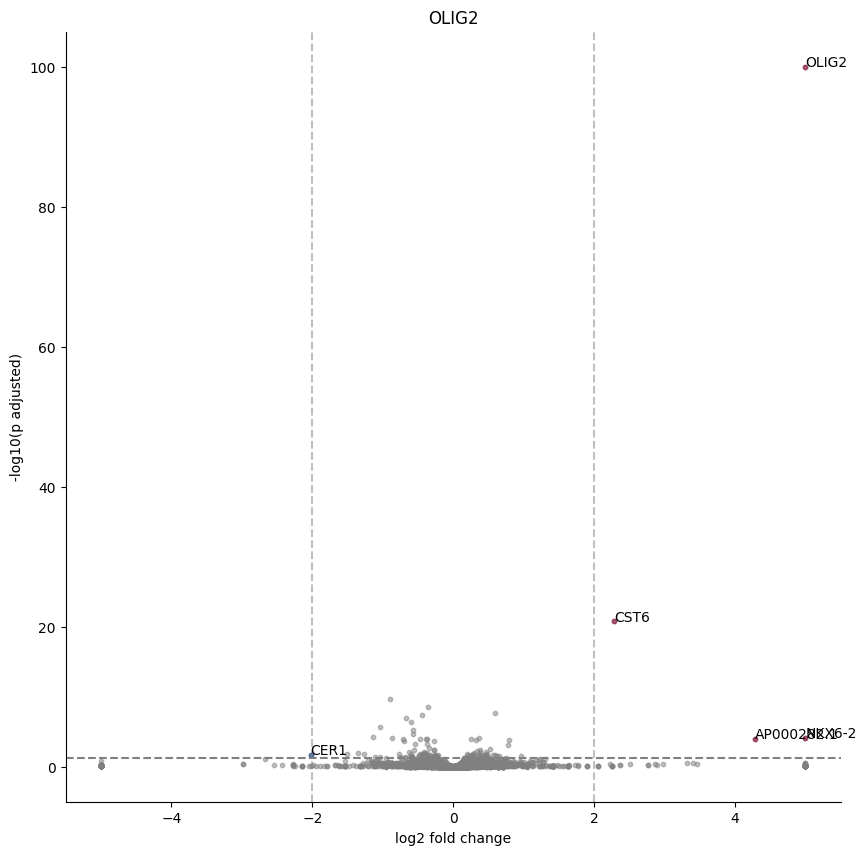

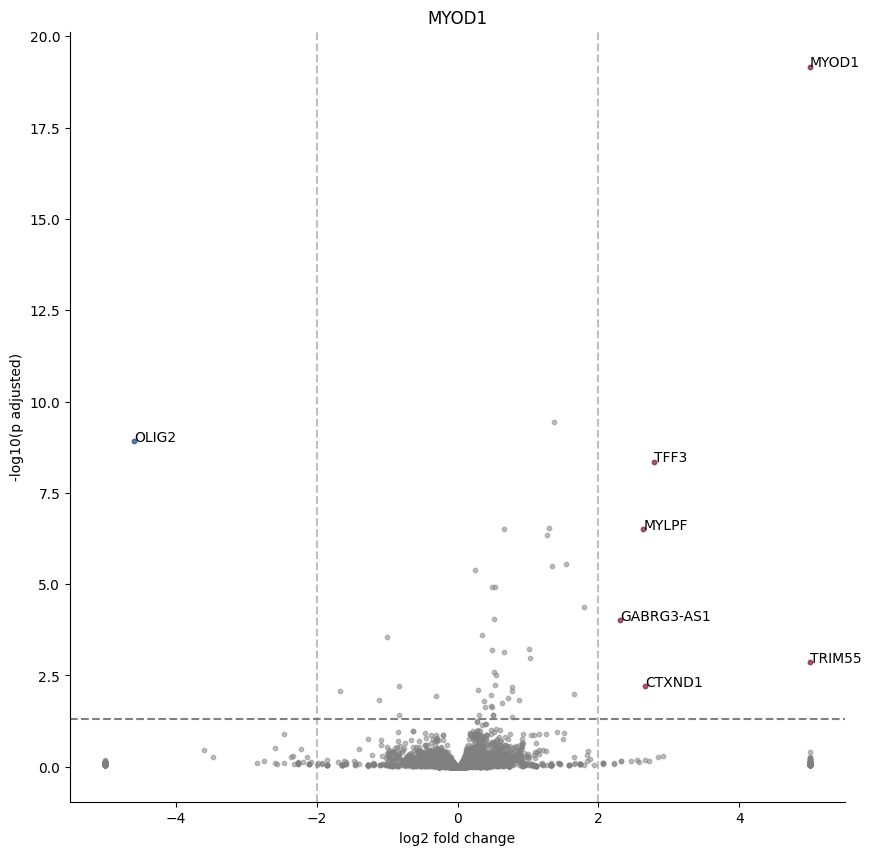

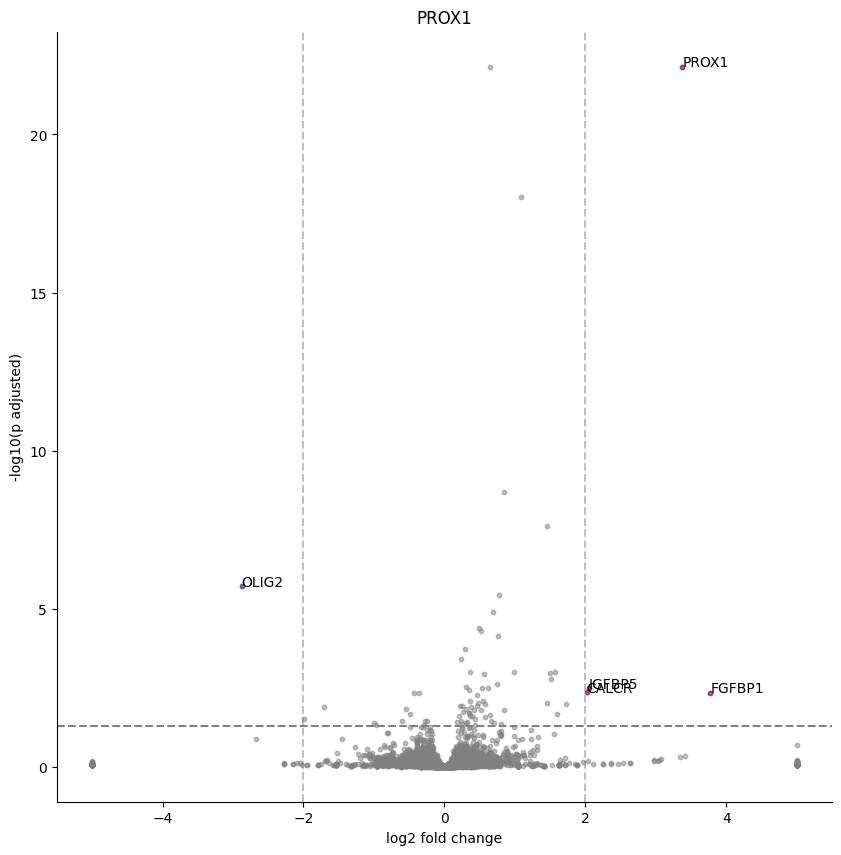

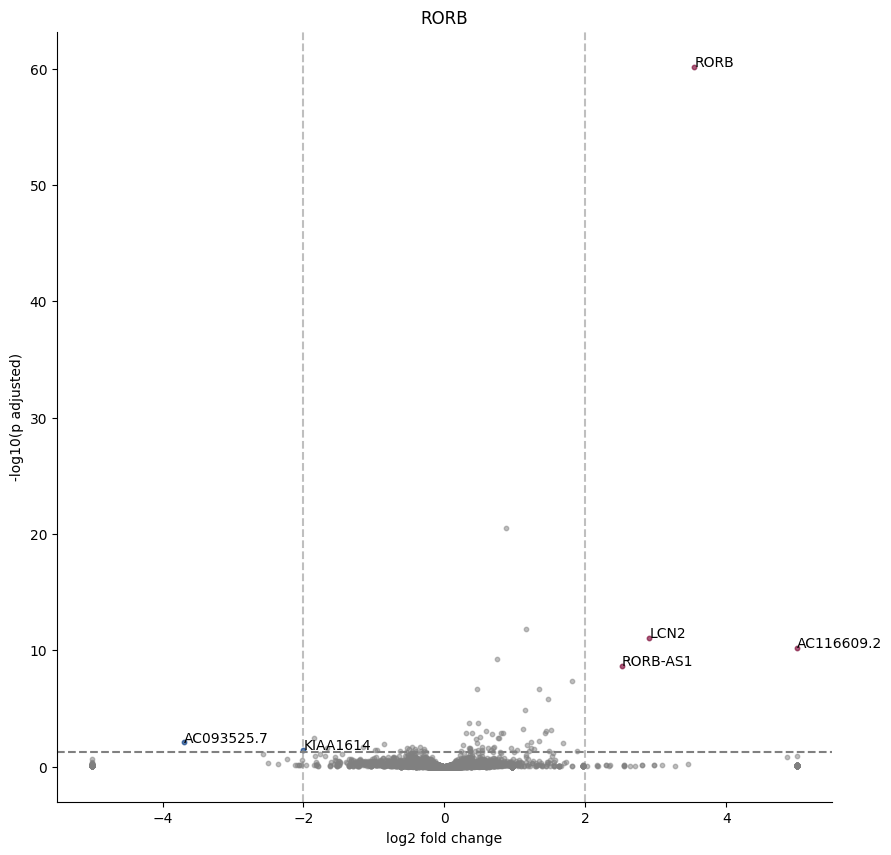

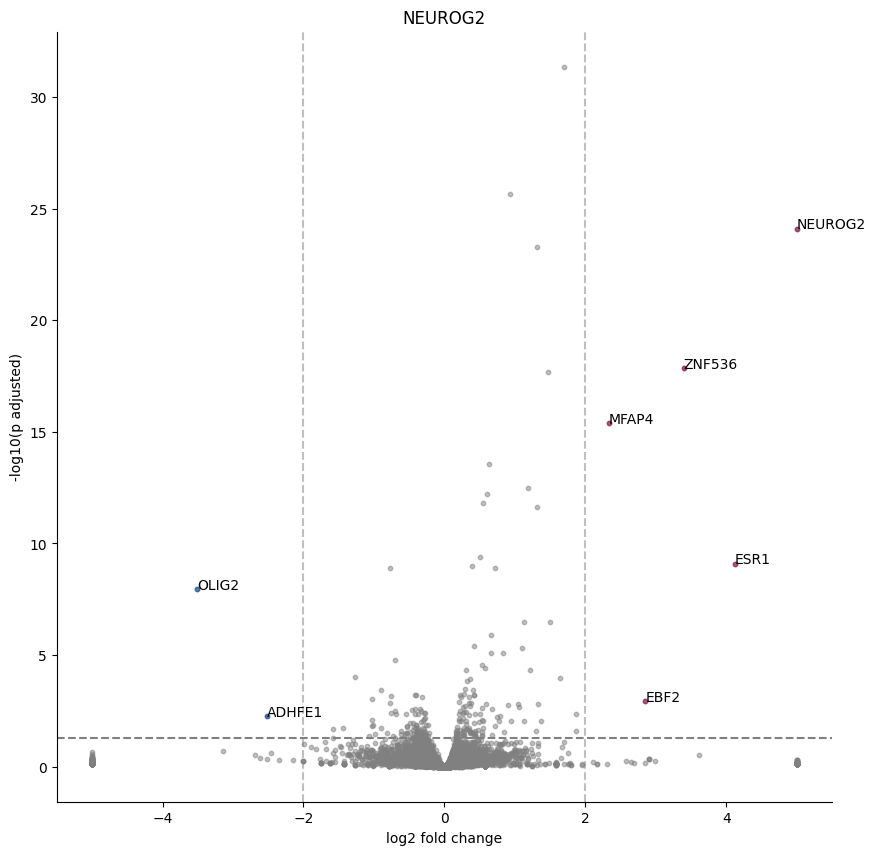

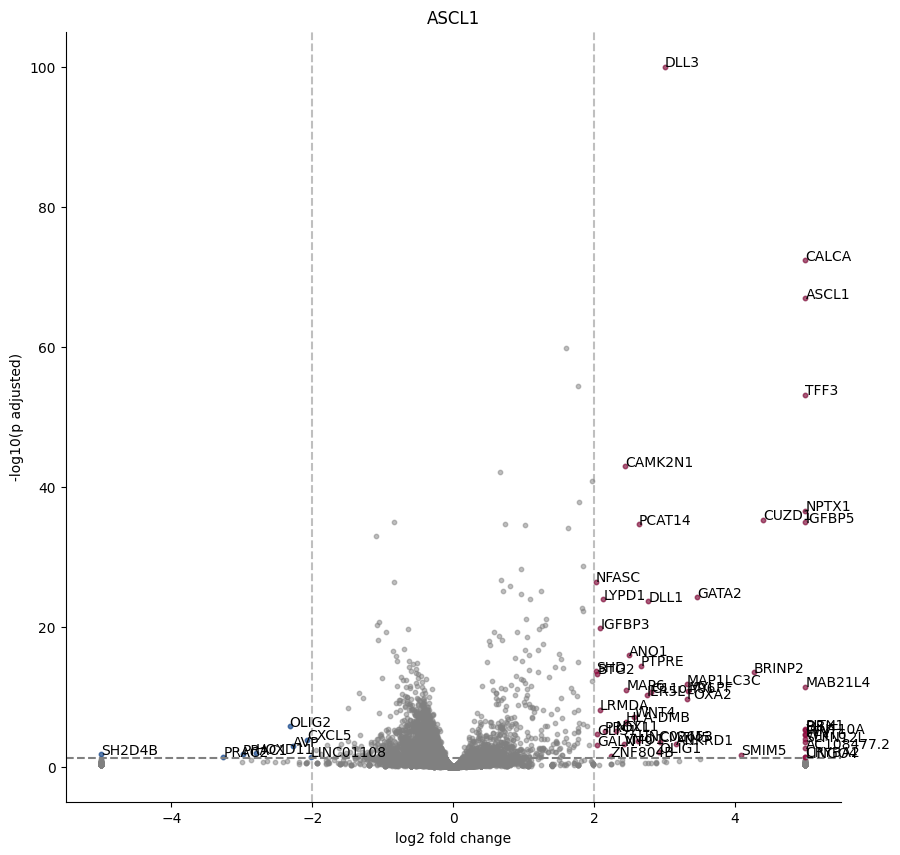

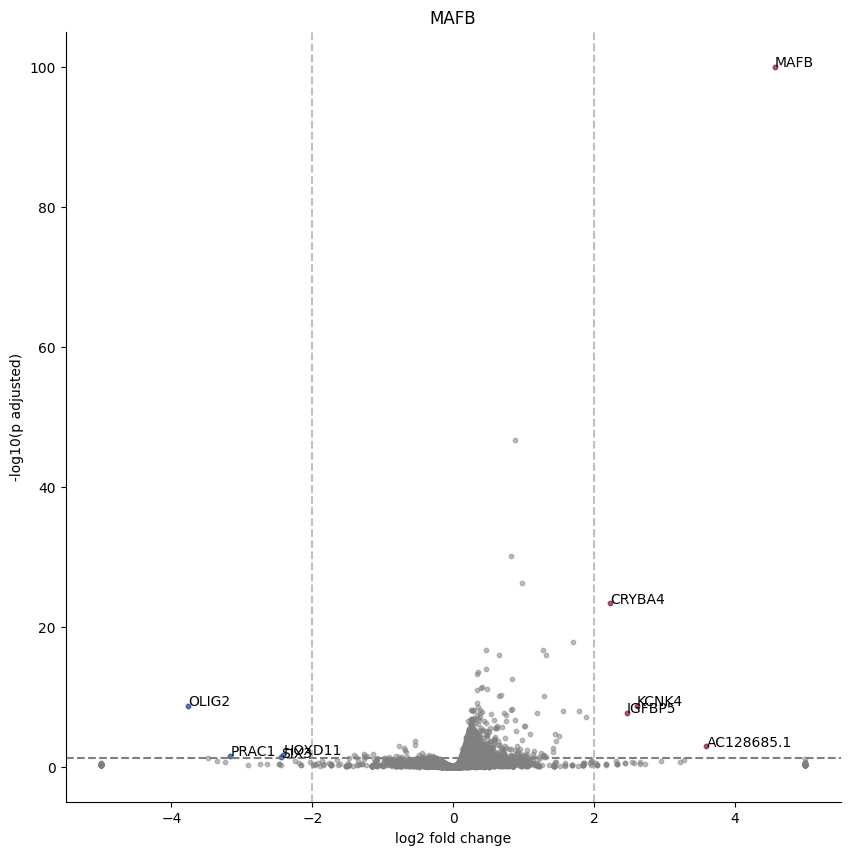

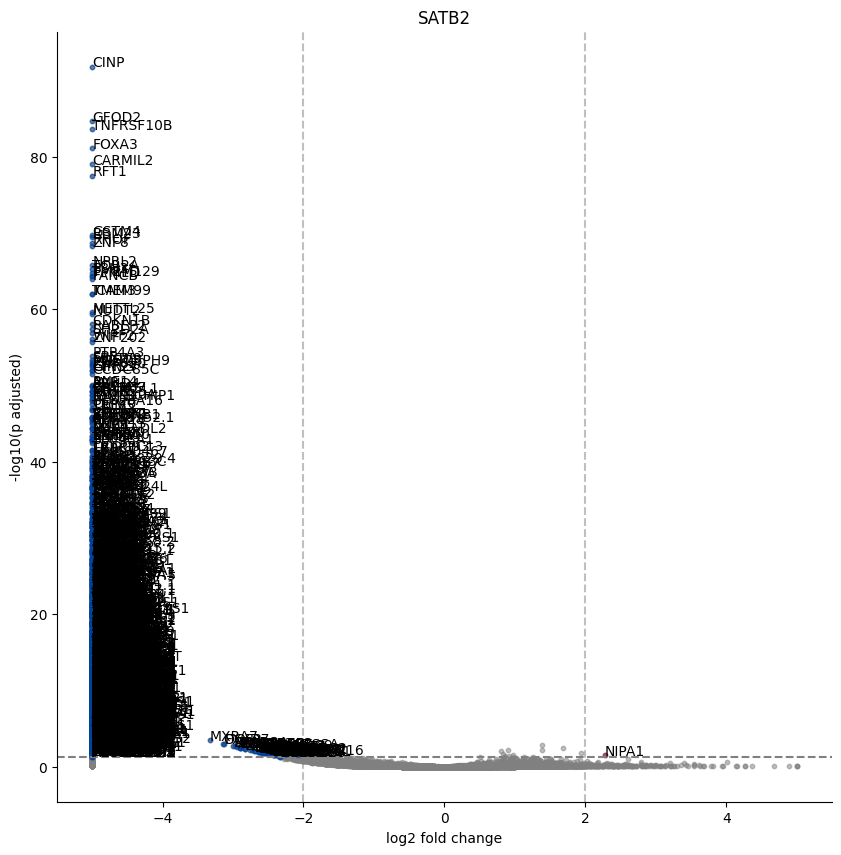

In [32]:
#create volcano plot for each perturbation state using log2 fold change and p adjusted values
#label genes with log2 fold change > 3 and p adjusted < 0.05

#create folder volcano plot in figures folder if it does not exist already
volcano_plot_folder = f'{figures_folder}volcano_plot/'
if not os.path.exists(volcano_plot_folder):
    os.makedirs(volcano_plot_folder)

for i, perturbation_state in enumerate(perturbation_states):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    #set boundaries for significance
    p_val_limit = 0.05
    log2_fold_change_limit = 2

    #create boundaries for upregulated and downregulated genes based on log2 fold change and p adjusted values 
    ax.axhline(-np.log10(p_val_limit), color='grey', linestyle='--')
    ax.axvline(-2, color='grey', linestyle='--', alpha=0.5)
    ax.axvline(2, color='grey', linestyle='--', alpha=0.5)
    
    

    ax.scatter(
        perturbation_state_ranked_genes[i]['log2_fold_change'], 
        -np.log10(perturbation_state_ranked_genes[i]['pvals_adj']),
        s=10, alpha=0.5, color='grey')
    #label genes with log2 fold change > 3 and p adjusted < 0.05 with the gene name found in gene symbols
    for j, gene in enumerate(perturbation_state_ranked_genes[i]['SYMBOL']):
        if (perturbation_state_ranked_genes[i]['log2_fold_change'][j] > log2_fold_change_limit) and (perturbation_state_ranked_genes[i]['pvals_adj'][j] < p_val_limit):
            ax.annotate(gene, (perturbation_state_ranked_genes[i]['log2_fold_change'][j], -np.log10(perturbation_state_ranked_genes[i]['pvals_adj'][j])))
            #plot in red
            ax.scatter(
                perturbation_state_ranked_genes[i]['log2_fold_change'][j],
                -np.log10(perturbation_state_ranked_genes[i]['pvals_adj'][j]),
                s=10, alpha=0.5, color='#93003a')
        elif (perturbation_state_ranked_genes[i]['log2_fold_change'][j] < -log2_fold_change_limit) and (perturbation_state_ranked_genes[i]['pvals_adj'][j] < p_val_limit):
            ax.annotate(gene, (perturbation_state_ranked_genes[i]['log2_fold_change'][j], -np.log10(perturbation_state_ranked_genes[i]['pvals_adj'][j])))
            #plot in blue
            ax.scatter(
                perturbation_state_ranked_genes[i]['log2_fold_change'][j],
                -np.log10(perturbation_state_ranked_genes[i]['pvals_adj'][j]),
                s=10, alpha=0.5, color='#00429d')




    ax.set_xlabel('log2 fold change')
    ax.set_ylabel('-log10(p adjusted)')
    ax.set_title(perturbation_state)
    plt.savefig(f'{volcano_plot_folder}{today}_{perturbation_state}.pdf', dpi=300,bbox_inches='tight')
    

/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


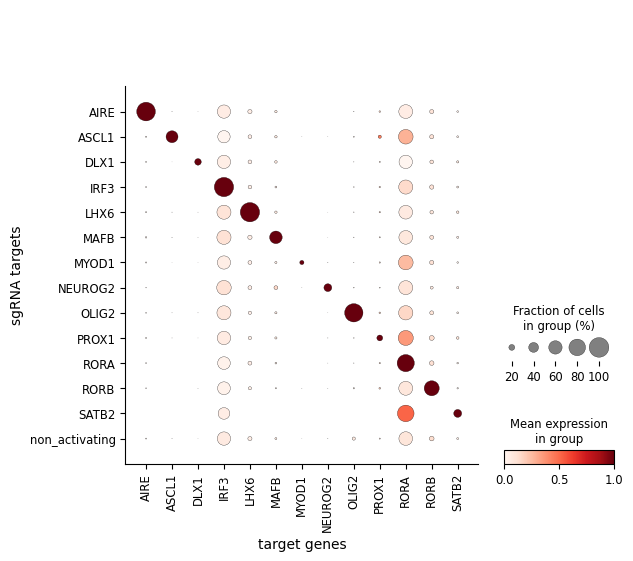

In [29]:
#create dotplot for each perturbation state with the 2 most differentially expressed genes
ax = sc.pl.dotplot(adata_filter_leiden,var_names=expected_tf, groupby='perturbation_state', layer='log1p', gene_symbols='SYMBOL', standard_scale='var', show=False)
ax['mainplot_ax'].set_xlabel('target genes')
ax['mainplot_ax'].set_ylabel('sgRNA targets')
#save figure
plt.savefig(f'{figures_folder}{today}_dotplot_sgrna_v_target_genes.pdf', dpi=300, bbox_inches='tight')

/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/anndata/_core/anndata.py:895: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['TSPAN6', 'DPM1', 'SCYL3', 'C1orf112', 'FUCA2']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")
/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


ValueError: adata.var_names contains duplicated items
Please rename these var names first for example using `adata.var_names_make_unique()`

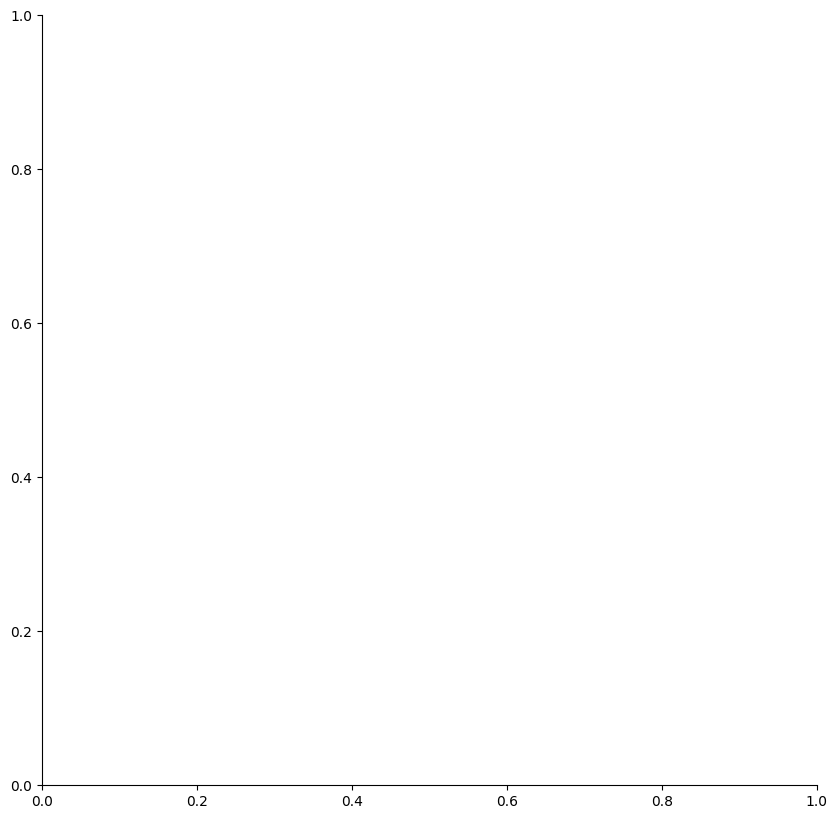

In [86]:
#plot 1 d histogram of target gene expression for each perturbation state
#find id for SYMBOL of expected_tf and map to adata_violin var name
#create copy of adata_violin to set var_names to SYMBOL
adata_violin = adata_pertubed.copy()
#only filter for var_names starting with ENSG
adata_violin = adata_violin[:,adata_violin.var_names.str.startswith('ENSG')]

adata_violin.var_names = adata_violin.var['SYMBOL']

for i,perturbation_state in enumerate(perturbation_states):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    
    
    
    #violin plot for each perturbation state filter adata for each perturbation state
    adata_pertubed_subset = adata_violin[adata_violin.obs['perturbation_state'] == perturbation_state]
    #plot violin plot for each perturbation state
    sc.pl.violin(
        adata_pertubed_subset, keys=expected_tf,
        ax=ax, show=False,
        rotation=90, 
        )

    ax.set_title(perturbation_state)
    #plt.savefig(f'{figures_folder}{today}_histogram_{perturbation_state}.pdf', dpi=300, bbox_inches='tight')